In [1]:
import pandas as pd
import os 
os.environ['KMP_DUPLICATE_LIB_OK']='True'

# Load Trader Data
trader_df = pd.read_csv('csv_files/historical_data.csv')

# Load Market Sentiment Data
sentiment_df = pd.read_csv('csv_files/sentiment.csv')


In [2]:
trader_df.head()

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12


In [3]:
sentiment_df.head()

,timestamp,value,classification,date
0,1517463000,30,Fear,2018-02-01
1,1517549400,15,Extreme Fear,2018-02-02
2,1517635800,40,Fear,2018-02-03
3,1517722200,24,Extreme Fear,2018-02-04
4,1517808600,11,Extreme Fear,2018-02-05


#### Trader Data Info

In [4]:
trader_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211224 entries, 0 to 211223
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Account           211224 non-null  object 
 1   Coin              211224 non-null  object 
 2   Execution Price   211224 non-null  float64
 3   Size Tokens       211224 non-null  float64
 4   Size USD          211224 non-null  float64
 5   Side              211224 non-null  object 
 6   Timestamp IST     211224 non-null  object 
 7   Start Position    211224 non-null  float64
 8   Direction         211224 non-null  object 
 9   Closed PnL        211224 non-null  float64
 10  Transaction Hash  211224 non-null  object 
 11  Order ID          211224 non-null  int64  
 12  Crossed           211224 non-null  bool   
 13  Fee               211224 non-null  float64
 14  Trade ID          211224 non-null  float64
 15  Timestamp         211224 non-null  float64
dtypes: bool(1), float64(

In [5]:
trader_df.describe()

,Execution Price,Size Tokens,Size USD,Start Position,Closed PnL,Order ID,Fee,Trade ID,Timestamp
count,211224.000000,2.112240e+05,2.112240e+05,2.112240e+05,211224.000000,2.112240e+05,211224.000000,2.112240e+05,2.112240e+05
mean,11414.723350,4.623365e+03,5.639451e+03,-2.994625e+04,48.749001,6.965388e+10,1.163967,5.628549e+14,1.737744e+12
std,29447.654868,1.042729e+05,3.657514e+04,6.738074e+05,919.164828,1.835753e+10,6.758854,3.257565e+14,8.689920e+09
min,0.000005,8.740000e-07,0.000000e+00,-1.433463e+07,-117990.104100,1.732711e+08,-1.175712,0.000000e+00,1.680000e+12
25%,4.854700,2.940000e+00,1.937900e+02,-3.762311e+02,0.000000,5.983853e+10,0.016121,2.810000e+14,1.740000e+12
50%,18.280000,3.200000e+01,5.970450e+02,8.472793e+01,0.000000,7.442939e+10,0.089578,5.620000e+14,1.740000e+12
75%,101.580000,1.879025e+02,2.058960e+03,9.337278e+03,5.792797,8.335543e+10,0.393811,8.460000e+14,1.740000e+12
max,109004.000000,1.582244e+07,3.921431e+06,3.050948e+07,135329.090100,9.014923e+10,837.471593,1.130000e+15,1.750000e+12


####  Sentiment Data Info

In [6]:
sentiment_df.info()
sentiment_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2644 entries, 0 to 2643
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   timestamp       2644 non-null   int64 
 1   value           2644 non-null   int64 
 2   classification  2644 non-null   object
 3   date            2644 non-null   object
dtypes: int64(2), object(2)
memory usage: 82.8+ KB


,timestamp,value
count,2.644000e+03,2644.000000
mean,1.631899e+09,46.981089
std,6.597967e+07,21.827680
min,1.517463e+09,5.000000
25%,1.574811e+09,28.000000
50%,1.631900e+09,46.000000
75%,1.688989e+09,66.000000
max,1.746164e+09,95.000000


In [7]:
sentiment_df['date'] = pd.to_datetime(sentiment_df['date'])

In [8]:
trader_df['Timestamp IST'] = pd.to_datetime(trader_df['Timestamp IST'], errors='coerce')

In [9]:
trader_df['trade_date'] = trader_df['Timestamp IST'].dt.date


#### handaling missing values

In [10]:
trader_df.isnull().sum()

Account                  0
Coin                     0
Execution Price          0
Size Tokens              0
Size USD                 0
Side                     0
Timestamp IST       131999
Start Position           0
Direction                0
Closed PnL               0
Transaction Hash         0
Order ID                 0
Crossed                  0
Fee                      0
Trade ID                 0
Timestamp                0
trade_date          131999
dtype: int64

In [11]:
trader_df.shape

(211224, 17)

In [12]:
sentiment_df.isnull().sum()

timestamp         0
value             0
classification    0
date              0
dtype: int64

#### Clean and prepare 

In [13]:
sentiment_df.columns = sentiment_df.columns.str.strip().str.lower().str.replace(" ", "_")
sentiment_df['date'] = pd.to_datetime(sentiment_df['date']).dt.date

sentiment_df.head()

,timestamp,value,classification,date
0,1517463000,30,Fear,2018-02-01
1,1517549400,15,Extreme Fear,2018-02-02
2,1517635800,40,Fear,2018-02-03
3,1517722200,24,Extreme Fear,2018-02-04
4,1517808600,11,Extreme Fear,2018-02-05


###  Merge Datasets

In [14]:
merged_df = pd.merge(trader_df, sentiment_df, how='left', left_on='trade_date', right_on='date')

In [15]:
merged_df.head()

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,...,Order ID,Crossed,Fee,Trade ID,Timestamp,trade_date,timestamp,value,classification,date
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,2024-02-12 22:50:00,0.000000,Buy,0.0,...,52017706630,True,0.345404,8.950000e+14,1.730000e+12,2024-02-12,1.707716e+09,70.0,Greed,2024-02-12
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,2024-02-12 22:50:00,986.524596,Buy,0.0,...,52017706630,True,0.005600,4.430000e+14,1.730000e+12,2024-02-12,1.707716e+09,70.0,Greed,2024-02-12
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,2024-02-12 22:50:00,1002.518996,Buy,0.0,...,52017706630,True,0.050431,6.600000e+14,1.730000e+12,2024-02-12,1.707716e+09,70.0,Greed,2024-02-12
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,2024-02-12 22:50:00,1146.558564,Buy,0.0,...,52017706630,True,0.050043,1.080000e+15,1.730000e+12,2024-02-12,1.707716e+09,70.0,Greed,2024-02-12
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,2024-02-12 22:50:00,1289.488521,Buy,0.0,...,52017706630,True,0.003055,1.050000e+15,1.730000e+12,2024-02-12,1.707716e+09,70.0,Greed,2024-02-12


#####  Preview result

In [16]:
merged_df['leverage'] = trader_df['Size USD'] / (trader_df['Execution Price'] * trader_df['Size Tokens'])

In [98]:
merged_imp_df=merged_df[['trade_date', 'Closed PnL','classification', 'Execution Price', 'Side','leverage']].dropna()

 ### EDA

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

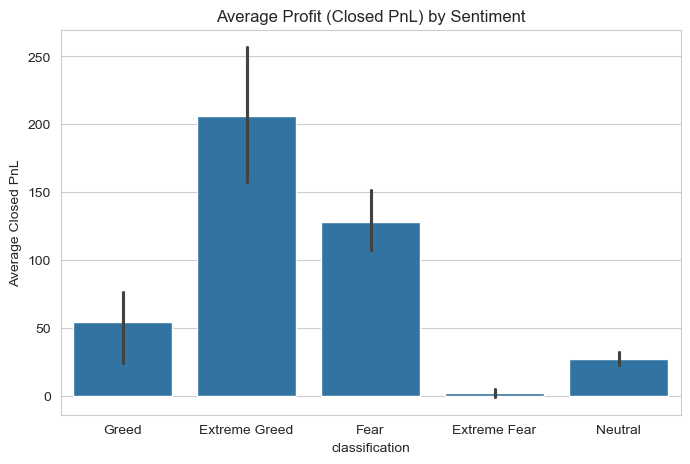

In [78]:
plt.figure(figsize=(8, 5))
sns.barplot(data=merged_df, x='classification', y='Closed PnL', estimator='mean')
plt.title("Average Profit (Closed PnL) by Sentiment")
plt.ylabel("Average Closed PnL")
plt.savefig('outputs/profit_vs_sentiment.png')
plt.show()

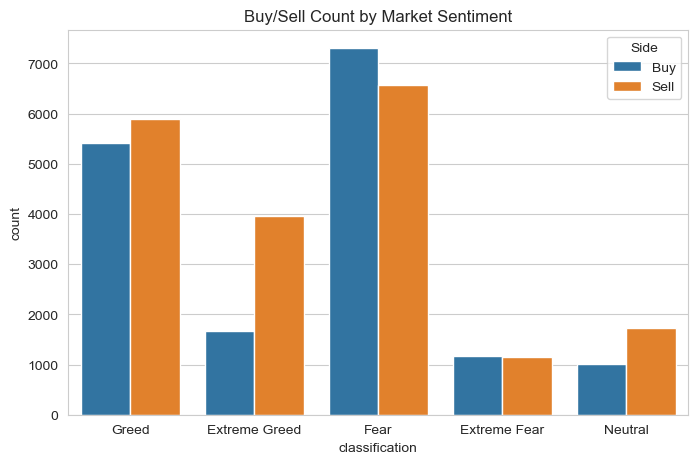

In [79]:
plt.figure(figsize=(8, 5))
sns.countplot(data=merged_df, x='classification', hue='Side')
plt.title("Buy/Sell Count by Market Sentiment")
plt.savefig('outputs/buy_sell_vs_sentiment.png')
plt.show()

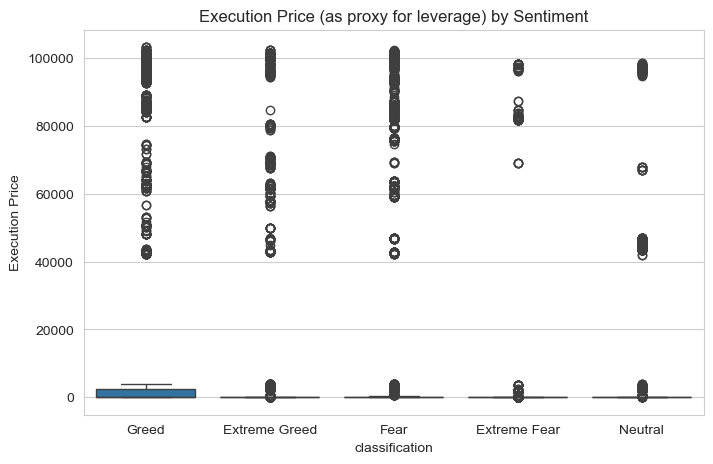

In [80]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=merged_df, x='classification', y='Execution Price')  # change y-axis to 'leverage' if you have it
plt.title("Execution Price (as proxy for leverage) by Sentiment")
plt.savefig('outputs/leverage_vs_sentiment.png')
plt.show()

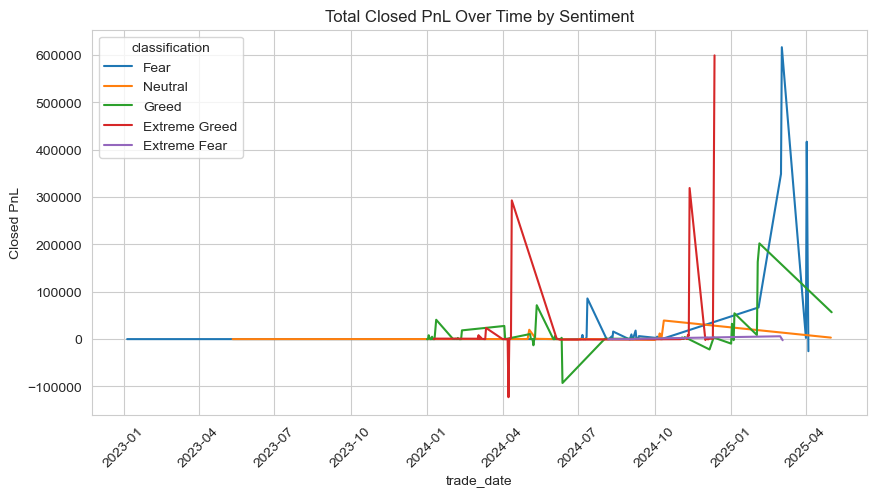

In [81]:
pnl_trend = merged_df.groupby(['trade_date', 'classification'])['Closed PnL'].sum().reset_index()

plt.figure(figsize=(10, 5))
sns.lineplot(data=pnl_trend, x='trade_date', y='Closed PnL', hue='classification')
plt.title("Total Closed PnL Over Time by Sentiment")
plt.xticks(rotation=45)
plt.savefig('outputs/pnl_over_time.png')
plt.show()

In [82]:
merged_df['Side'] = merged_df['Side'].str.title()

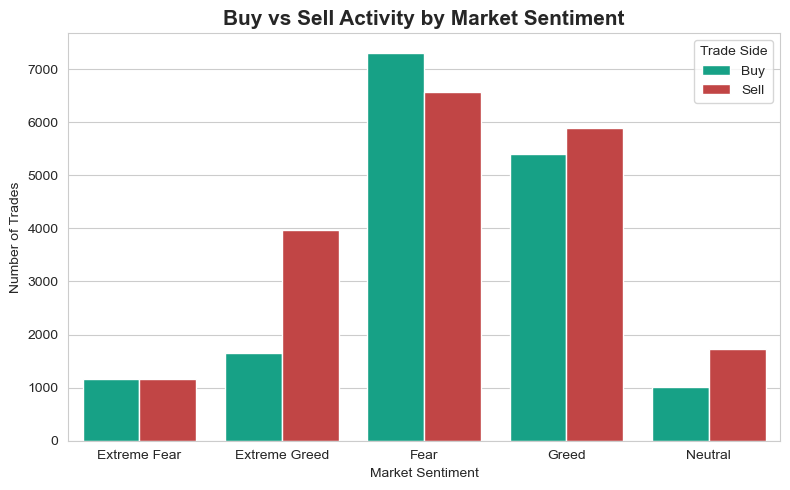

In [83]:
# Grouped counts
count_df = plot_df.groupby(['classification', 'Side']).size().reset_index(name='Count')

# Barplot
plt.figure(figsize=(8, 5))
sns.set_style("whitegrid")
sns.barplot(
    data=count_df,
    x='classification',
    y='Count',
    hue='Side',
    palette={'Buy': '#00B894', 'Sell': '#D63031'}
)

# Labels and Title
plt.title("Buy vs Sell Activity by Market Sentiment", fontsize=15, weight='bold')
plt.ylabel("Number of Trades")
plt.xlabel("Market Sentiment")
plt.legend(title="Trade Side")
plt.tight_layout()
plt.savefig('outputs/buy_sell_vs_sentiment.png')
plt.show()

In [84]:
pnl_by_day = merged_df.groupby(['trade_date', 'classification'])['Closed PnL'].mean().reset_index()

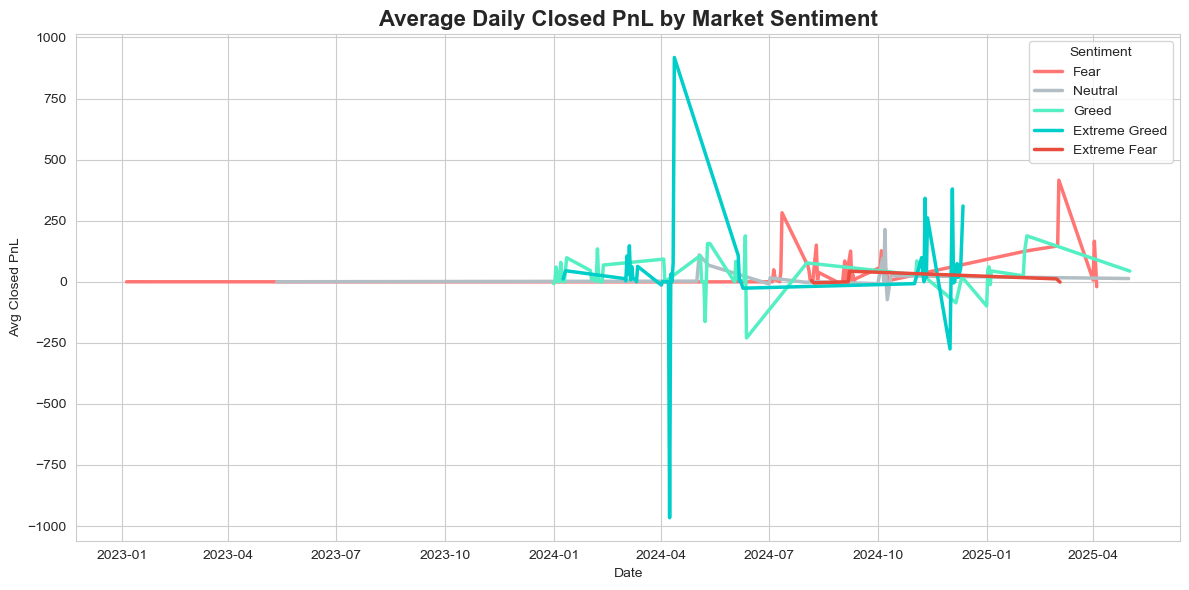

In [85]:
# Use unique sentiment values from the data
unique_sentiments = pnl_by_day['classification'].unique()

# Assign distinct colors to each
sentiment_palette = {
    'Extreme Fear': '#e74c3c',
    'Fear': '#ff7675',
    'Neutral': '#b2bec3',
    'Greed': '#55efc4',
    'Extreme Greed': '#00cec9'
}

# Plot
plt.figure(figsize=(12, 6))
sns.set_style("whitegrid")

sns.lineplot(
    data=pnl_by_day,
    x='trade_date',
    y='Closed PnL',
    hue='classification',
    palette=sentiment_palette,
    linewidth=2.5
)

plt.title("Average Daily Closed PnL by Market Sentiment", fontsize=16, weight='bold')
plt.xlabel("Date")
plt.ylabel("Avg Closed PnL")
plt.legend(title="Sentiment", loc='upper right')
plt.tight_layout()
plt.savefig('outputs/pnl_over_time_by_sentiment.png')
plt.show()


In [86]:
merged_df

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,...,Crossed,Fee,Trade ID,Timestamp,trade_date,timestamp,value,classification,date,leverage
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,Buy,2024-02-12 22:50:00,0.000000,Buy,0.0000,...,True,0.345404,8.950000e+14,1.730000e+12,2024-02-12,1.707716e+09,70.0,Greed,2024-02-12,1.000000
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,Buy,2024-02-12 22:50:00,986.524596,Buy,0.0000,...,True,0.005600,4.430000e+14,1.730000e+12,2024-02-12,1.707716e+09,70.0,Greed,2024-02-12,1.000000
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,Buy,2024-02-12 22:50:00,1002.518996,Buy,0.0000,...,True,0.050431,6.600000e+14,1.730000e+12,2024-02-12,1.707716e+09,70.0,Greed,2024-02-12,0.999999
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,Buy,2024-02-12 22:50:00,1146.558564,Buy,0.0000,...,True,0.050043,1.080000e+15,1.730000e+12,2024-02-12,1.707716e+09,70.0,Greed,2024-02-12,1.000001
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,Buy,2024-02-12 22:50:00,1289.488521,Buy,0.0000,...,True,0.003055,1.050000e+15,1.730000e+12,2024-02-12,1.707716e+09,70.0,Greed,2024-02-12,1.000036
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211219,0x72743ae2822edd658c0c50608fd7c5c501b2afbd,FARTCOIN,1.1010,382.20,420.80,Sell,NaT,7546.600000,Close Long,-20.2566,...,False,0.042080,1.990000e+14,1.750000e+12,NaT,NaN,NaN,NaN,NaN,0.999995
211220,0x72743ae2822edd658c0c50608fd7c5c501b2afbd,FARTCOIN,1.1010,2124.10,2338.63,Sell,NaT,7164.400000,Close Long,-112.5773,...,False,0.233863,9.260000e+14,1.750000e+12,NaT,NaN,NaN,NaN,NaN,0.999998
211221,0x72743ae2822edd658c0c50608fd7c5c501b2afbd,FARTCOIN,1.1010,423.40,466.16,Sell,NaT,5040.300000,Close Long,-22.4402,...,False,0.046616,6.930000e+14,1.750000e+12,NaT,NaN,NaN,NaN,NaN,0.999993
211222,0x72743ae2822edd658c0c50608fd7c5c501b2afbd,FARTCOIN,1.1010,3599.80,3963.38,Sell,NaT,4616.900000,Close Long,-190.7894,...,False,0.396337,4.180000e+14,1.750000e+12,NaT,NaN,NaN,NaN,NaN,1.000000


In [87]:
pnl_by_day

,trade_date,classification,Closed PnL
0,2023-01-05,Fear,0.000000
1,2023-05-12,Neutral,0.000000
2,2024-01-01,Greed,-7.196192
3,2024-01-02,Greed,0.000000
4,2024-01-03,Greed,60.176945
...,...,...,...
153,2025-04-02,Fear,165.954175
154,2025-04-03,Fear,75.801651
155,2025-04-04,Fear,-20.059496
156,2025-05-01,Neutral,13.337738


In [99]:
merged_imp_df

,trade_date,Closed PnL,classification,Execution Price,Side,leverage
0,2024-02-12,0.0,Greed,7.9769,Buy,1.000000
1,2024-02-12,0.0,Greed,7.9800,Buy,1.000000
2,2024-02-12,0.0,Greed,7.9855,Buy,0.999999
3,2024-02-12,0.0,Greed,7.9874,Buy,1.000001
4,2024-02-12,0.0,Greed,7.9894,Buy,1.000036
...,...,...,...,...,...,...
209972,2025-04-01,0.0,Fear,3627.0000,Sell,0.999990
209973,2025-04-01,0.0,Fear,3627.0000,Sell,1.000000
209974,2025-04-01,0.0,Fear,3627.0000,Sell,1.000001
209975,2025-04-01,0.0,Fear,3627.0000,Sell,0.999999


### Export Processed CSVs


In [100]:
merged_imp_df.to_csv("csv_files/processed_trader_data.csv", index=False)

In [101]:
pnl_by_day.to_csv("csv_files/daily_avg_pnl_by_sentiment.csv", index=False)